In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import copy
import pickle

def make_plot(n,m,s=[1,1]):
    if n==1:
        return plt.subplots(n,m,figsize=(m*4*s[0],n*2.8*s[1]),squeeze=False,layout='tight')
    else:
        return plt.subplots(n,m,figsize=(m*4*s[0],n*2.6*s[1]),squeeze=False,layout='tight')
        
np.set_printoptions(suppress=True)
plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


plot_label_3sr  =r'$3$SR'
plot_label_3sr_pi  =r'$3$SR-PI'
plot_label_3sr_pd  =r'$3$SR-PD'
plot_label_3sr_psi05  =r'$3$SR,$\psi=0.5$' 
plot_label_3sr_psi2  =r'$3$SR,$\psi=2.$' 
plot_label_3sr_climber  =r'$3$SR-CLIMBER2-LPJ'
plot_label_3sr_mesmo  =r'$3$SR-MESMO'
plot_label_4pr  =r'$4$PR'
plot_label_4pr_pi  =r'$4$PR-PI'
plot_label_4pr_pd  =r'$4$PR-PD'
plot_label_4pr_psi05  =r'$4$PR,$\psi=0.5$' 
plot_label_4pr_psi2  =r'$4$PR,$\psi=2.$' 
plot_label_4pr_climber  =r'$4$PR-CLIMBER2-LPJ'
plot_label_4pr_mesmo  =r'$4$PR-MESMO'
plot_label_4prx =r'$4$PR-X'
plot_label_4prx_psi069 =r'$4$PR-X'
plot_label_4prx_psi05  =r'$4$PRX,$\psi=0.5$' 
plot_label_4prx_psi2  =r'$4$PRX,$\psi=2.$'

plot_color_3sr  ='blue'
plot_color_3sr_pi  ='blue'
plot_color_3sr_pd  ='blue'
plot_color_3sr_psi05  ='blue'
plot_color_3sr_psi2  ='blue'
plot_color_3sr_climber  ='red'
plot_color_3sr_mesmo  ='orange'
plot_color_4pr  ='green'
plot_color_4pr_pi  ='green' 
plot_color_4pr_pd  ='green' 
plot_color_4pr_psi05  ='green'
plot_color_4pr_psi2  ='green'
plot_color_4pr_climber  ='red'
plot_color_4pr_mesmo  ='orange'
plot_color_4prx ='black'
plot_color_4prx_psi069 ='black'
plot_color_4prx_psi05 ='black'
plot_color_4prx_psi2 ='black'

plot_style_3sr  ='-'
plot_style_3sr_pi  ='-'
plot_style_3sr_pd  ='--'
plot_style_3sr_psi05  ='--'
plot_style_3sr_psi2  =':'
plot_style_3sr_climber  ='-'
plot_style_3sr_mesmo  ='-'
plot_style_4pr  ='--'
plot_style_4pr_pi  ='-'
plot_style_4pr_pd  ='--'
plot_style_4pr_psi05  ='--'
plot_style_4pr_psi2  =':'
plot_style_4pr_climber  ='--'
plot_style_4pr_mesmo  ='--'
plot_style_4prx =':'
plot_style_4prx_psi069 ='-'
plot_style_4prx_psi05 ='--'
plot_style_4prx_psi2 =':'

root_run = 'Building_Interpretable_Climate_Emulators_forEconomics/DEQN/runs'
root_save = 'Building_Interpretable_Climate_Emulators_forEconomics/figures_replication/figures_5-8_26-31/figs_replication/'

# Figure 30

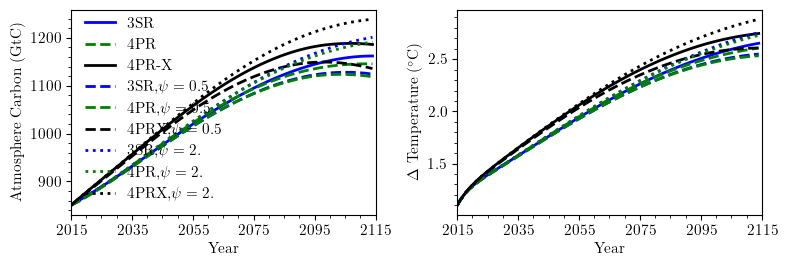

In [5]:
### READING THE DATA from cdice_3sr_pi (psi=0.67)
path = root_run + '/cdice_3sr_pi_opt/3sr_pi_opt/'
exparams_3sr = pd.read_csv(path + 'exoparams.csv')
states_3sr = pd.read_csv(path +'states.csv')
ps_3sr = pd.read_csv(path +'ps.csv')
def_3sr = pd.read_csv(path +'defs.csv')
time_3sr = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_3sr_pi_psi05
path = root_run + '/cdice_3sr_pi_psi05_opt/3sr_pi_psi05_opt/'
exparams_3sr_psi05 = pd.read_csv(path + 'exoparams.csv')
states_3sr_psi05 = pd.read_csv(path +'states.csv')
ps_3sr_psi05 = pd.read_csv(path +'ps.csv')
def_3sr_psi05 = pd.read_csv(path +'defs.csv')
time_3sr_psi05 = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_3sr_pi_psi2
path = root_run + '/cdice_3sr_pi_psi2_opt/3sr_pi_psi2_opt/'
exparams_3sr_psi2 = pd.read_csv(path + 'exoparams.csv')
states_3sr_psi2 = pd.read_csv(path +'states.csv')
ps_3sr_psi2 = pd.read_csv(path +'ps.csv')
def_3sr_psi2 = pd.read_csv(path +'defs.csv')
time_3sr_psi2 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi (psi=0.67)
path = root_run + '/cdice_4pr_pi_opt/4pr_pi_opt/'
exparams_4pr = pd.read_csv(path + 'exoparams.csv')
states_4pr = pd.read_csv(path +'states.csv')
ps_4pr = pd.read_csv(path +'ps.csv')
def_4pr = pd.read_csv(path +'defs.csv')
time_4pr = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi_psi05
path = root_run + '/cdice_4pr_pi_psi05_opt/4pr_pi_psi05_opt/'
exparams_4pr_psi05 = pd.read_csv(path + 'exoparams.csv')
states_4pr_psi05 = pd.read_csv(path +'states.csv')
ps_4pr_psi05 = pd.read_csv(path +'ps.csv')
def_4pr_psi05 = pd.read_csv(path +'defs.csv')
time_4pr_psi05 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi_psi2
path = root_run + '/cdice_4pr_pi_psi2_opt/4pr_pi_psi2_opt/'
exparams_4pr_psi2 = pd.read_csv(path + 'exoparams.csv')
states_4pr_psi2 = pd.read_csv(path +'states.csv')
ps_4pr_psi2 = pd.read_csv(path +'ps.csv')
def_4pr_psi2 = pd.read_csv(path +'defs.csv')
time_4pr_psi2 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx (psi=0.67)
path = root_run + '/cdice_4prx_pi_opt/4prx_pi_opt/'
exparams_4prx_psi069 = pd.read_csv(path + 'exoparams.csv')
states_4prx_psi069 = pd.read_csv(path +'states.csv')
ps_4prx_psi069 = pd.read_csv(path +'ps.csv')
def_4prx_psi069 = pd.read_csv(path +'defs.csv')
time_4prx_psi069 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx_psi05
path = root_run + '/cdice_4prx_pi_psi05_opt/4prx_pi_psi05_opt/'
exparams_4prx_psi05 = pd.read_csv(path + 'exoparams.csv')
states_4prx_psi05 = pd.read_csv(path +'states.csv')
ps_4prx_psi05 = pd.read_csv(path +'ps.csv')
def_4prx_psi05 = pd.read_csv(path +'defs.csv')
time_4prx_psi05 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx_psi2
path = root_run + '/cdice_4prx_pi_psi2_opt/4prx_pi_psi2_opt/'
exparams_4prx_psi2 = pd.read_csv(path + 'exoparams.csv')
states_4prx_psi2 = pd.read_csv(path +'states.csv')
ps_4prx_psi2 = pd.read_csv(path +'ps.csv')
def_4prx_psi2 = pd.read_csv(path +'defs.csv')
time_4prx_psi2 = pd.read_csv(path +'time.csv')


init_year = 2015
ts = time_3sr['time'] + init_year

tl = 100
fin_year = 2115

fig, axs = make_plot(1,2)

###################### MATx ############################################
de = 'MATx'

de_3sr = states_3sr[de]
de_4pr = states_4pr[de]
de_4prx_psi069 = states_4prx_psi069[de]

de_3sr_psi05 = states_3sr_psi05[de]
de_4pr_psi05 = states_4pr_psi05[de]
de_4prx_psi05 = states_4prx_psi05[de]

de_3sr_psi2 = states_3sr_psi2[de]
de_4pr_psi2 = states_4pr_psi2[de]
de_4prx_psi2 = states_4prx_psi2[de]


df_val = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr[5], de_3sr[35],de_3sr[85]],
                      "4PR":[de_4pr[5], de_4pr[35],de_4pr[85]],
                      "4PR-X":[de_4prx_psi069[5], de_4prx_psi069[35],de_4prx_psi069[85]],
                      "3SR, $\psi=0.5$":[de_3sr_psi05[5], de_3sr_psi05[35],de_3sr_psi05[85]],
                      "4PR, $\psi=0.5$":[de_4pr_psi05[5], de_4pr_psi05[35],de_4pr_psi05[85]],
                      "4PR-X, $\psi=0.5$":[de_4prx_psi05[5], de_4prx_psi05[35],de_4prx_psi05[85]],
                      "3SR, $\psi=2.$":[de_3sr_psi2[5], de_3sr_psi2[35],de_3sr_psi2[85]],
                      "4PR, $\psi=2.$":[de_4pr_psi2[5], de_4pr_psi2[35],de_4pr_psi2[85]],
                      "4PR-X, $\psi=2.$":[de_4prx_psi2[5], de_4prx_psi2[35],de_4prx_psi2[85]]})

x = ts[0:tl]

axs[0,0].plot(x, de_3sr[0:tl],   linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr,  label=plot_label_3sr)
axs[0,0].plot(x, de_4pr[0:tl],   linewidth=2,color=plot_color_4pr,  linestyle=plot_style_4pr,  label=plot_label_4pr)
axs[0,0].plot(x, de_4prx_psi069[0:tl],   linewidth=2,color=plot_color_4prx_psi069,  linestyle=plot_style_4prx_psi069,  label=plot_label_4prx_psi069)

axs[0,0].plot(x, de_3sr_psi05[0:tl],   linewidth=2,color=plot_color_3sr_psi05,  linestyle=plot_style_3sr_psi05,  label=plot_label_3sr_psi05)
axs[0,0].plot(x, de_4pr_psi05[0:tl],   linewidth=2,color=plot_color_4pr_psi05,  linestyle=plot_style_4pr_psi05,  label=plot_label_4pr_psi05)
axs[0,0].plot(x, de_4prx_psi05[0:tl],   linewidth=2,color=plot_color_4prx_psi05,  linestyle=plot_style_4prx_psi05,  label=plot_label_4prx_psi05)

axs[0,0].plot(x, de_3sr_psi2[0:tl],   linewidth=2,color=plot_color_3sr_psi2,  linestyle=plot_style_3sr_psi2,  label=plot_label_3sr_psi2)
axs[0,0].plot(x, de_4pr_psi2[0:tl],   linewidth=2,color=plot_color_4pr_psi2,  linestyle=plot_style_4pr_psi2,  label=plot_label_4pr_psi2)
axs[0,0].plot(x, de_4prx_psi2[0:tl],   linewidth=2,color=plot_color_4prx_psi2,  linestyle=plot_style_4prx_psi2,  label=plot_label_4prx_psi2)

axs[0,0].set_xlim([init_year,fin_year])

###################### TATx ############################################
de = 'TATx'

de_3sr = states_3sr[de]
de_4pr = states_4pr[de]
de_4prx_psi069 = states_4prx_psi069[de]

de_3sr_psi05 = states_3sr_psi05[de]
de_4pr_psi05 = states_4pr_psi05[de]
de_4prx_psi05 = states_4prx_psi05[de]

de_3sr_psi2 = states_3sr_psi2[de]
de_4pr_psi2 = states_4pr_psi2[de]
de_4prx_psi2 = states_4prx_psi2[de]


df_val = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr[5], de_3sr[35],de_3sr[85]],
                      "4PR":[de_4pr[5], de_4pr[35],de_4pr[85]],
                      "4PR-X":[de_4prx_psi069[5], de_4prx_psi069[35],de_4prx_psi069[85]],
                      "3SR, $\psi=0.5$":[de_3sr_psi05[5], de_3sr_psi05[35],de_3sr_psi05[85]],
                      "4PR, $\psi=0.5$":[de_4pr_psi05[5], de_4pr_psi05[35],de_4pr_psi05[85]],
                      "4PR-X, $\psi=0.5$":[de_4prx_psi05[5], de_4prx_psi05[35],de_4prx_psi05[85]],
                      "3SR, $\psi=2.$":[de_3sr_psi2[5], de_3sr_psi2[35],de_3sr_psi2[85]],
                      "4PR, $\psi=2.$":[de_4pr_psi2[5], de_4pr_psi2[35],de_4pr_psi2[85]],
                      "4PR-X, $\psi=2.$":[de_4prx_psi2[5], de_4prx_psi2[35],de_4prx_psi2[85]]})

x = ts[0:tl]

axs[0,1].plot(x, de_3sr[0:tl],   linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr,  label=plot_label_3sr)
axs[0,1].plot(x, de_4pr[0:tl],   linewidth=2,color=plot_color_4pr,  linestyle=plot_style_4pr,  label=plot_label_4pr)
axs[0,1].plot(x, de_4prx_psi069[0:tl],   linewidth=2,color=plot_color_4prx_psi069,  linestyle=plot_style_4prx_psi069,  label=plot_label_4prx_psi069)

axs[0,1].plot(x, de_3sr_psi05[0:tl],   linewidth=2,color=plot_color_3sr_psi05,  linestyle=plot_style_3sr_psi05,  label=plot_label_3sr_psi05)
axs[0,1].plot(x, de_4pr_psi05[0:tl],   linewidth=2,color=plot_color_4pr_psi05,  linestyle=plot_style_4pr_psi05,  label=plot_label_4pr_psi05)
axs[0,1].plot(x, de_4prx_psi05[0:tl],   linewidth=2,color=plot_color_4prx_psi05,  linestyle=plot_style_4prx_psi05,  label=plot_label_4prx_psi05)

axs[0,1].plot(x, de_3sr_psi2[0:tl],   linewidth=2,color=plot_color_3sr_psi2,  linestyle=plot_style_3sr_psi2,  label=plot_label_3sr_psi2)
axs[0,1].plot(x, de_4pr_psi2[0:tl],   linewidth=2,color=plot_color_4pr_psi2,  linestyle=plot_style_4pr_psi2,  label=plot_label_4pr_psi2)
axs[0,1].plot(x, de_4prx_psi2[0:tl],   linewidth=2,color=plot_color_4prx_psi2,  linestyle=plot_style_4prx_psi2,  label=plot_label_4prx_psi2)

axs[0,1].set_xlim([init_year,fin_year])


axs[0,0].set_ylabel(r'Atmosphere Carbon (GtC)')
axs[0,1].set_ylabel(r'$\Delta$ Temperature ($^\circ$C)')

axs[-1,0].set_xlabel(r'Year')
axs[-1,1].set_xlabel(r'Year')

axs[0,0].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[0,1].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])


axs[0,0].minorticks_on()
axs[0,1].minorticks_on()


axs[0,0].legend(frameon=False,loc='lower left',ncol=1)

fig.savefig(root_save + 'Figure_30.png',dpi=300) 

# Figure 31

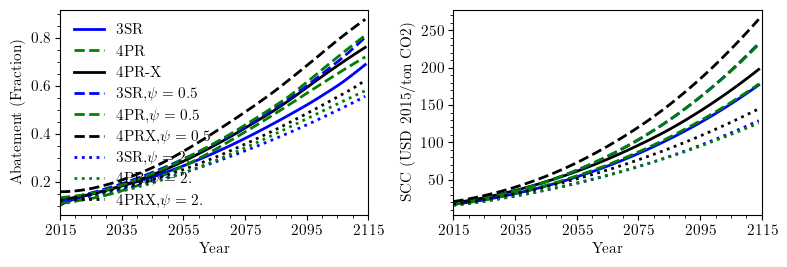

In [6]:
### READING THE DATA from cdice_3sr_pi (psi=0.67)
path = root_run + '/cdice_3sr_pi_opt/3sr_pi_opt/'
exparams_3sr = pd.read_csv(path + 'exoparams.csv')
states_3sr = pd.read_csv(path +'states.csv')
ps_3sr = pd.read_csv(path +'ps.csv')
def_3sr = pd.read_csv(path +'defs.csv')
time_3sr = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_3sr_pi_psi05
path = root_run + '/cdice_3sr_pi_psi05_opt/3sr_pi_psi05_opt/'
exparams_3sr_psi05 = pd.read_csv(path + 'exoparams.csv')
states_3sr_psi05 = pd.read_csv(path +'states.csv')
ps_3sr_psi05 = pd.read_csv(path +'ps.csv')
def_3sr_psi05 = pd.read_csv(path +'defs.csv')
time_3sr_psi05 = pd.read_csv(path +'time.csv')

### READING THE DATA from cdice_3sr_pi_psi2
path = root_run + '/cdice_3sr_pi_psi2_opt/3sr_pi_psi2_opt/'
exparams_3sr_psi2 = pd.read_csv(path + 'exoparams.csv')
states_3sr_psi2 = pd.read_csv(path +'states.csv')
ps_3sr_psi2 = pd.read_csv(path +'ps.csv')
def_3sr_psi2 = pd.read_csv(path +'defs.csv')
time_3sr_psi2 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi (psi=0.67)
path = root_run + '/cdice_4pr_pi_opt/4pr_pi_opt/'
exparams_4pr = pd.read_csv(path + 'exoparams.csv')
states_4pr = pd.read_csv(path +'states.csv')
ps_4pr = pd.read_csv(path +'ps.csv')
def_4pr = pd.read_csv(path +'defs.csv')
time_4pr = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi_psi05
path = root_run + '/cdice_4pr_pi_psi05_opt/4pr_pi_psi05_opt/'
exparams_4pr_psi05 = pd.read_csv(path + 'exoparams.csv')
states_4pr_psi05 = pd.read_csv(path +'states.csv')
ps_4pr_psi05 = pd.read_csv(path +'ps.csv')
def_4pr_psi05 = pd.read_csv(path +'defs.csv')
time_4pr_psi05 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4pr_pi_psi2
path = root_run + '/cdice_4pr_pi_psi2_opt/4pr_pi_psi2_opt/'
exparams_4pr_psi2 = pd.read_csv(path + 'exoparams.csv')
states_4pr_psi2 = pd.read_csv(path +'states.csv')
ps_4pr_psi2 = pd.read_csv(path +'ps.csv')
def_4pr_psi2 = pd.read_csv(path +'defs.csv')
time_4pr_psi2 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx (psi=0.67)
path = root_run + '/cdice_4prx_pi_opt/4prx_pi_opt/'
exparams_4prx_psi069 = pd.read_csv(path + 'exoparams.csv')
states_4prx_psi069 = pd.read_csv(path +'states.csv')
ps_4prx_psi069 = pd.read_csv(path +'ps.csv')
def_4prx_psi069 = pd.read_csv(path +'defs.csv')
time_4prx_psi069 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx_psi05
path = root_run + '/cdice_4prx_pi_psi05_opt/4prx_pi_psi05_opt/'
exparams_4prx_psi05 = pd.read_csv(path + 'exoparams.csv')
states_4prx_psi05 = pd.read_csv(path +'states.csv')
ps_4prx_psi05 = pd.read_csv(path +'ps.csv')
def_4prx_psi05 = pd.read_csv(path +'defs.csv')
time_4prx_psi05 = pd.read_csv(path +'time.csv')

### READING THE DATA from  cdice_4prx_psi2
path = root_run + '/cdice_4prx_pi_psi2_opt/4prx_pi_psi2_opt/'
exparams_4prx_psi2 = pd.read_csv(path + 'exoparams.csv')
states_4prx_psi2 = pd.read_csv(path +'states.csv')
ps_4prx_psi2 = pd.read_csv(path +'ps.csv')
def_4prx_psi2 = pd.read_csv(path +'defs.csv')
time_4prx_psi2 = pd.read_csv(path +'time.csv')


init_year = 2015
ts = time_3sr['time'] + init_year

tl = 100
fin_year = 2115

fig, axs = make_plot(1,2)

###################### muy ############################################
de = 'muy'

de_3sr = ps_3sr[de]
de_4pr = ps_4pr[de]
de_4prx_psi069 = ps_4prx_psi069[de]

de_3sr_psi05 = ps_3sr_psi05[de]
de_4pr_psi05 = ps_4pr_psi05[de]
de_4prx_psi05 = ps_4prx_psi05[de]

de_3sr_psi2 = ps_3sr_psi2[de]
de_4pr_psi2 = ps_4pr_psi2[de]
de_4prx_psi2 = ps_4prx_psi2[de]


df_val = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr[5], de_3sr[35],de_3sr[85]],
                      "4PR":[de_4pr[5], de_4pr[35],de_4pr[85]],
                      "4PR-X":[de_4prx_psi069[5], de_4prx_psi069[35],de_4prx_psi069[85]],
                      "3SR, $\psi=0.5$":[de_3sr_psi05[5], de_3sr_psi05[35],de_3sr_psi05[85]],
                      "4PR, $\psi=0.5$":[de_4pr_psi05[5], de_4pr_psi05[35],de_4pr_psi05[85]],
                      "4PR-X, $\psi=0.5$":[de_4prx_psi05[5], de_4prx_psi05[35],de_4prx_psi05[85]],
                      "3SR, $\psi=2.$":[de_3sr_psi2[5], de_3sr_psi2[35],de_3sr_psi2[85]],
                      "4PR, $\psi=2.$":[de_4pr_psi2[5], de_4pr_psi2[35],de_4pr_psi2[85]],
                      "4PR-X, $\psi=2.$":[de_4prx_psi2[5], de_4prx_psi2[35],de_4prx_psi2[85]]})

x = ts[0:tl]

axs[0,0].plot(x, de_3sr[0:tl],   linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr,  label=plot_label_3sr)
axs[0,0].plot(x, de_4pr[0:tl],   linewidth=2,color=plot_color_4pr,  linestyle=plot_style_4pr,  label=plot_label_4pr)
axs[0,0].plot(x, de_4prx_psi069[0:tl],   linewidth=2,color=plot_color_4prx_psi069,  linestyle=plot_style_4prx_psi069,  label=plot_label_4prx_psi069)

axs[0,0].plot(x, de_3sr_psi05[0:tl],   linewidth=2,color=plot_color_3sr_psi05,  linestyle=plot_style_3sr_psi05,  label=plot_label_3sr_psi05)
axs[0,0].plot(x, de_4pr_psi05[0:tl],   linewidth=2,color=plot_color_4pr_psi05,  linestyle=plot_style_4pr_psi05,  label=plot_label_4pr_psi05)
axs[0,0].plot(x, de_4prx_psi05[0:tl],   linewidth=2,color=plot_color_4prx_psi05,  linestyle=plot_style_4prx_psi05,  label=plot_label_4prx_psi05)

axs[0,0].plot(x, de_3sr_psi2[0:tl],   linewidth=2,color=plot_color_3sr_psi2,  linestyle=plot_style_3sr_psi2,  label=plot_label_3sr_psi2)
axs[0,0].plot(x, de_4pr_psi2[0:tl],   linewidth=2,color=plot_color_4pr_psi2,  linestyle=plot_style_4pr_psi2,  label=plot_label_4pr_psi2)
axs[0,0].plot(x, de_4prx_psi2[0:tl],   linewidth=2,color=plot_color_4prx_psi2,  linestyle=plot_style_4prx_psi2,  label=plot_label_4prx_psi2)

axs[0,0].set_xlim([init_year,fin_year])

###################### SCC ############################################
de = 'scc'

de_3sr = def_3sr[de]
de_4pr = def_4pr[de]
de_4prx_psi069 = def_4prx_psi069[de]

de_3sr_psi05 = def_3sr_psi05[de]
de_4pr_psi05 = def_4pr_psi05[de]
de_4prx_psi05 = def_4prx_psi05[de]

de_3sr_psi2 = def_3sr_psi2[de]
de_4pr_psi2 = def_4pr_psi2[de]
de_4prx_psi2 = def_4prx_psi2[de]


df_val = pd.DataFrame({"time":[2020, 2050, 2100],
                        "3SR":[de_3sr[5], de_3sr[35],de_3sr[85]],
                      "4PR":[de_4pr[5], de_4pr[35],de_4pr[85]],
                      "4PR-X":[de_4prx_psi069[5], de_4prx_psi069[35],de_4prx_psi069[85]],
                      "3SR, $\psi=0.5$":[de_3sr_psi05[5], de_3sr_psi05[35],de_3sr_psi05[85]],
                      "4PR, $\psi=0.5$":[de_4pr_psi05[5], de_4pr_psi05[35],de_4pr_psi05[85]],
                      "4PR-X, $\psi=0.5$":[de_4prx_psi05[5], de_4prx_psi05[35],de_4prx_psi05[85]],
                      "3SR, $\psi=2.$":[de_3sr_psi2[5], de_3sr_psi2[35],de_3sr_psi2[85]],
                      "4PR, $\psi=2.$":[de_4pr_psi2[5], de_4pr_psi2[35],de_4pr_psi2[85]],
                      "4PR-X, $\psi=2.$":[de_4prx_psi2[5], de_4prx_psi2[35],de_4prx_psi2[85]]})

x = ts[0:tl]

axs[0,1].plot(x, de_3sr[0:tl],   linewidth=2,color=plot_color_3sr,  linestyle=plot_style_3sr,  label=plot_label_3sr)
axs[0,1].plot(x, de_4pr[0:tl],   linewidth=2,color=plot_color_4pr,  linestyle=plot_style_4pr,  label=plot_label_4pr)
axs[0,1].plot(x, de_4prx_psi069[0:tl],   linewidth=2,color=plot_color_4prx_psi069,  linestyle=plot_style_4prx_psi069,  label=plot_label_4prx_psi069)

axs[0,1].plot(x, de_3sr_psi05[0:tl],   linewidth=2,color=plot_color_3sr_psi05,  linestyle=plot_style_3sr_psi05,  label=plot_label_3sr_psi05)
axs[0,1].plot(x, de_4pr_psi05[0:tl],   linewidth=2,color=plot_color_4pr_psi05,  linestyle=plot_style_4pr_psi05,  label=plot_label_4pr_psi05)
axs[0,1].plot(x, de_4prx_psi05[0:tl],   linewidth=2,color=plot_color_4prx_psi05,  linestyle=plot_style_4prx_psi05,  label=plot_label_4prx_psi05)

axs[0,1].plot(x, de_3sr_psi2[0:tl],   linewidth=2,color=plot_color_3sr_psi2,  linestyle=plot_style_3sr_psi2,  label=plot_label_3sr_psi2)
axs[0,1].plot(x, de_4pr_psi2[0:tl],   linewidth=2,color=plot_color_4pr_psi2,  linestyle=plot_style_4pr_psi2,  label=plot_label_4pr_psi2)
axs[0,1].plot(x, de_4prx_psi2[0:tl],   linewidth=2,color=plot_color_4prx_psi2,  linestyle=plot_style_4prx_psi2,  label=plot_label_4prx_psi2)

axs[0,1].set_xlim([init_year,fin_year])


axs[0,0].set_ylabel(r'Abatement (Fraction)')
axs[0,1].set_ylabel(r'SCC (USD 2015/ton CO2)')

axs[-1,0].set_xlabel(r'Year')
axs[-1,1].set_xlabel(r'Year')

axs[0,0].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])
axs[0,1].set_xticks([2015, 2035, 2055, 2075, 2095, 2115])


axs[0,0].minorticks_on()
axs[0,1].minorticks_on()


axs[0,0].legend(frameon=False,loc='upper left',ncol=1)

fig.savefig(root_save + 'Figure_31.png',dpi=300) 